In [0]:
|

##googLeNet을 이용한 연예인 얼굴 인식 NN

- 최종 test accuracy : 0.9235
- 소요시간 : 25s 669ms/step

##학습된 googLeNet 가져오기


In [0]:





%tensorflow_version 2.x
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import shutil
from keras.callbacks import EarlyStopping
from tensorflow.keras import models, datasets

from google.colab import drive
drive.mount('/content/drive')

TensorFlow 2.x selected.


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import zipfile
root_dir = '/content/drive/Shared drives/scsa_2019_a/Project/dataset.zip'
#data_dir = pathlib.Path(root_dir)
#data_dir_cwd = pathlib.Path('/content/sample_data')
# data_list = pathlib.Path('/content/drive/Shared drives/scsa_2019_a/Project/dataset_test').glob('*')
#data_list = pathlib.Path('/content/drive/Shared drives/scsa_2019_a/Project/testset/dataset_raw.zip')
zip_ref = zipfile.ZipFile(root_dir, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()
#drive.mount('/content/drive/')
# for loc in data_list:
#   if loc == '/tmp/tmpwpnw1k1r' : continue 
#   zip_ref = zipfile.ZipFile(loc, 'r')
#   zip_ref.extractall("/tmp3")
#   zip_ref.close()

In [0]:
import random

###데이터를 가져오고 테스트 데이터와 트레이닝 데이터로 분류

In [0]:
# !rmdir -f /tmp/tmpwpnw1k1r
data_path = '/tmp/dataset_final'

In [0]:
data_dir = pathlib.Path(data_path)

tf.io.gfile.mkdir('/test2/')
test_dir = pathlib.Path('/test2/')
image_count = len(list(data_dir.glob('*/*')))
image_count
sep_test = True
print(image_count)

7347


In [0]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != '└asdfsafdsafsaafsd'])
CLASS_NAMES
print(CLASS_NAMES)

['hoona' 'yoonho' 'hyori' 'jisung' 'bts' 'iu' 'mingi' 'woosung' 'youngae'
 'twice' 'sodam' 'jaeseuk' 'jyp' 'goeun' 'joon' 'yuna']


!cp 

랜덤한 숫자 뽑기

In [0]:
if sep_test:
  for name in CLASS_NAMES:
    files = list(data_dir.glob(name + '/*'))
    randList = list(range(0, len(list(data_dir.glob(name + '/*')))))

    randList = random.sample(randList, int(len(list(data_dir.glob(name + '/*'))) * 0.2))
    print('/test2/' + name)
    tf.io.gfile.mkdir('/test2/' + name)
    print(randList)
    print(type(str(test_dir)))
    for n in randList:
      filedir = str(files[n])
      #print(name)
      
      print(str(test_dir) + '/' + name + '/' + filedir.split('/')[-1])  

      shutil.move(filedir, str(test_dir) + '/' + name + '/' + filedir.split('/')[-1])


/test2/hoona
[115, 61, 101, 143, 114, 108, 55, 92, 68, 105, 135, 54, 53, 58, 121, 18, 14, 8, 3, 64, 128, 81, 30, 112, 72, 32, 71, 120, 4, 31, 10]
<class 'str'>
/test2/hoona/hoona (130).jpg
/test2/hoona/hoona (48).jpg
/test2/hoona/hoona (135).jpg
/test2/hoona/hoona (35).jpg
/test2/hoona/hoona (101).jpg
/test2/hoona/hoona (87).jpg
/test2/hoona/hoona (10).jpg
/test2/hoona/hoona (119).JPG
/test2/hoona/hoona (22).jpg
/test2/hoona/hoona (94).jpg
/test2/hoona/hoona (69).JPG
/test2/hoona/hoona (123).jpg
/test2/hoona/hoona (117).jpg
/test2/hoona/hoona (3).jpg
/test2/hoona/hoona (12).jpg
/test2/hoona/hoona (90).jpg
/test2/hoona/hoona (108).jpg
/test2/hoona/hoona (2).JPEG
/test2/hoona/hoona (74).JPG
/test2/hoona/hoona (45).JPG
/test2/hoona/hoona (7).jpg
/test2/hoona/hoona (1).jpeg
/test2/hoona/hoona (138).jpg
/test2/hoona/hoona (150).jpg
/test2/hoona/hoona (4).jpg
/test2/hoona/hoona (100).jpg
/test2/hoona/hoona (141).jpg
/test2/hoona/hoona (24).jpg
/test2/hoona/hoona (1).bmp
/test2/hoona/hoona (1

In [0]:
!ls /test2

bts    hoona  iu       jisung  jyp    sodam  woosung  youngae
goeun  hyori  jaeseuk  joon    mingi  twice  yoonho   yuna


### Image Generator 생성

In [0]:

# image generator for unziped directory 
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = (
    tf.keras.preprocessing.image.ImageDataGenerator(
        width_shift_range=0.01,
        height_shift_range=0.01,
        horizontal_flip=True, 
        #vertical_flip=True,
        rotation_range=15,
        brightness_range=[0.8,1.2],
        #zoom_range=0.01,
        validation_split=0.2,
        rescale=1./255))



image_generator_cwd = (
    tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)) # preprocessing이라는 모듈 밑에 이미지를 처리하는 애들이 있고, 그 안에 있음.

In [0]:
BATCH_SIZE = 128
IMG_HEIGHT = 128
IMG_WIDTH = 128
#STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(
                      directory=str(data_dir),
                      batch_size=BATCH_SIZE,
                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                      classes = list(CLASS_NAMES),
                      subset='training'
                      )

test_data_gen = image_generator.flow_from_directory(
                      directory=str(data_dir),
                      batch_size=BATCH_SIZE,
                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                      classes = list(CLASS_NAMES),
                      subset='validation'
                      )
final_gen = image_generator_cwd.flow_from_directory(
                        directory=str(test_dir),
                        batch_size=26,
                        shuffle=True,
                        target_size=(IMG_HEIGHT, IMG_WIDTH), # target_size : 이미지들의 사이즈를 조작
                        classes = list(CLASS_NAMES)
                        )


Found 4711 images belonging to 16 classes.
Found 1172 images belonging to 16 classes.
Found 1464 images belonging to 16 classes.


Early Stopping Preperation

In [0]:
epochs_to_wait_for_improve =10
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=epochs_to_wait_for_improve)

googLeNet을 가져온다

In [0]:
import tensorflow.keras.applications.inception_v3 as incept

IN_IMG_SIZE = 128    # > 48: mnist image size 28일 경우 마지막 maxpooling 불가.

# load VGG16
model_incept = incept.InceptionV3(
    weights="imagenet", 
    include_top=False,    # dense layer 이 후는 제외
    input_tensor=tf.keras.layers.Input(shape=(IN_IMG_SIZE, IN_IMG_SIZE, 3))
    #input_tensor=keras.layers.Input(shape=(49, 49, 3))
    )
 
# summarize the model
model_incept.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
______________________

전체 레이어를 재학습시킨다

In [0]:
# Freeze the layers except the last 4 layers
for layer in model_incept.layers:
    layer.trainable = True
for layer in model_incept.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fe9c88c20b8> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe93ffac278> True
<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7fe9d6a01828> True
<tensorflow.python.keras.layers.core.Activation object at 0x7fe93ff670f0> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe93ffac6a0> True
<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7fe93fec2ac8> True
<tensorflow.python.keras.layers.core.Activation object at 0x7fe93fec7080> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe93fec2780> True
<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7fe93feee748> True
<tensorflow.python.keras.layers.core.Activation object at 0x7fe93feee9e8> True
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fe93feee400> True
<tensorflow.python.keras.layers.convolutional.Conv2D 

이제 우리가 커스터마이징 할 새로운 모델을 만든다

In [0]:
model_fine = tf.keras.models.Sequential()
model_fine.add(model_incept)
model_fine.add(tf.keras.layers.Flatten())
model_fine.add(tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax'))
model_fine.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                131088    
Total params: 21,933,872
Trainable params: 21,899,440
Non-trainable params: 34,432
_________________________________________________________________


Model Checkpoint를 콜백으로 설정하여 가장 좋은 값을 저장

In [0]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

In [0]:
model_fine.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [0]:
epoch_n = 500

In [0]:
class_weights=[1., 1., 1., 1., 1.2, 1.5, 1., 1., 1., 1.5, 1., 1., 1., 1., 1., 1.,]

history_basic = model_fine.fit_generator(train_data_gen, 
                        epochs=epoch_n,
                        callbacks=[early_stopping_callback, mc],
                        class_weight=class_weights,
                        validation_data=test_data_gen)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 37 steps, validate for 10 steps
Epoch 1/500
37/37 [==============================] - 37s 994ms/step - loss: 2.4478 - acc: 0.2484 - val_loss: 6906.1906 - val_acc: 0.1203
Epoch 2/500
37/37 [==============================] - 26s 697ms/step - loss: 1.6178 - acc: 0.5050 - val_loss: 693.0527 - val_acc: 0.0324
Epoch 3/500
37/37 [==============================] - 26s 697ms/step - loss: 1.1850 - acc: 0.6589 - val_loss: 161.7983 - val_acc: 0.1032
Epoch 4/500
37/37 [==============================] - 26s 701ms/step - loss: 1.1982 - acc: 0.6720 - val_loss: 4.5897 - val_acc: 0.1416
Epoch 5/500
37/37 [==============================] - 25s 668ms/step - loss: 0.7535 - acc: 0.7686 - val_loss: 7266.5027 - val_acc: 0.0802
Epoch 6/500
37/37 [==============================] - 26s 701ms/step - loss: 0.4579 - acc: 0.8533 - val_loss: 2.0929 - val_acc: 0.4778
Epoch 7/500
37/37 

### 가장 준수한 성적이 나온 모델을 load해온다

In [0]:
model_test = tf.keras.models.load_model('/content/best_model.h5')

In [0]:
#model_test.evaluate_generator(final_gen, verbose=2)
model_fine = model_test
model_fine.evaluate_generator(final_gen, verbose=2)

  ...
    to  
  ['...']
57/57 - 2s - loss: 0.3155 - acc: 0.9235


[0.31548142217491804, 0.92349726]

### loss의 변화 추이 및 사진에 대한 NN의 judge 보여주기

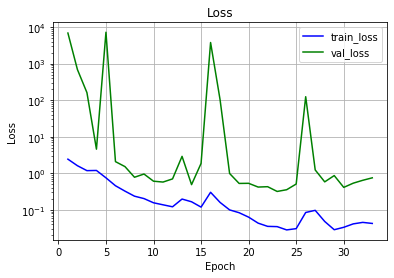

In [0]:
loss = history_basic.history['loss']
epochs = range(1, len(loss)+1)

plt.title('Loss')
plt.plot(epochs, history_basic.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history_basic.history['val_loss'], 'g', label='val_loss')
#plt.ylim([0,0.5])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.semilogy()
plt.legend(loc='best')
plt.show()

## Evaluate

In [0]:
test_accuracy = model_fine.evaluate_generator(final_gen, verbose=1)

  ...
    to  
  ['...']
57/57 [==============================] - 2s 29ms/step - loss: 0.3233 - acc: 0.9235


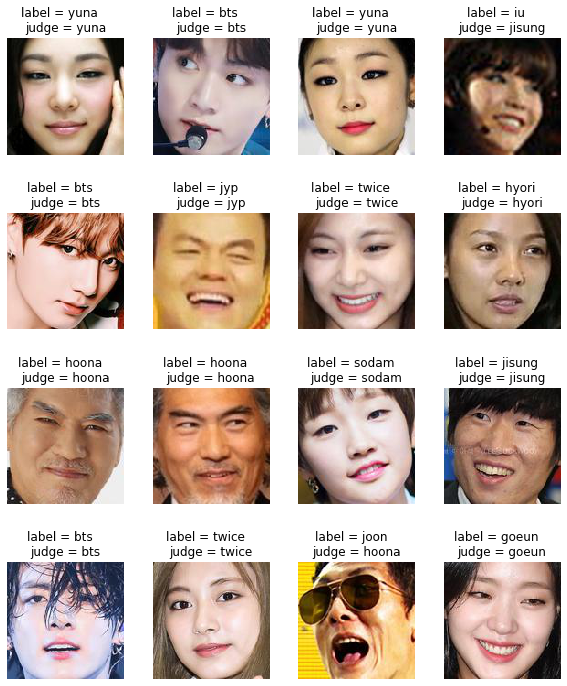

In [0]:
def show_batch(data_gen, class_l):
  # get image and label from data generator
  img_batch, l_batch = next(data_gen) 
  plt.figure(figsize=(10,10))
  ret = []
  img_title = model_fine.predict(img_batch)
  for img in img_title:
    ret.append(np.array(img).argmax())
  for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.5, wspace=0.2)
    plt.imshow(img_batch[n])
    title_name = 'label = ' + class_l[l_batch[n]==1][0] + "   \n" + "judge = " + CLASS_NAMES[ret[n]]
    plt.title(title_name)
    plt.axis('off')

show_batch(final_gen, CLASS_NAMES)

### Confusion Matrix와 Classification Report

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
test_data_gen = image_generator_cwd.flow_from_directory(
                        directory=str(test_dir),
                        batch_size=BATCH_SIZE,
                        shuffle=False,
                        target_size=(IMG_HEIGHT, IMG_WIDTH), # target_size : 이미지들의 사이즈를 조작
                        classes = list(CLASS_NAMES)
                        )

Y_pred = model_fine.predict_generator(test_data_gen, 1464 // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_data_gen.classes, y_pred))

Found 1464 images belonging to 16 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[ 30   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  45   0   0   0   0   0   1   0   0   0   0   0   2   0   0]
 [  0   0  64   0   0   1   0   0   0   1   0   0   0   2   0   2]
 [  0   0   0  27   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   3   0   0 116   1   0   0   1   5   1   0   1   0   0   0]
 [  0   1   2   1   0 143   0   0   0  22   2   0   0   1   0   2]
 [  2   1   0   0   2   0 104   3   0   0   1   0   0   0   0   0]
 [  0   0   0   1   1   0   0  82   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   1   0   1  30   3   0   0   0   1   0   2]
 [  0   0   2   0   0   0   0   0   0 158   1   0   0   1   0   3]
 [  0   0   0   0   0   0   0   1   1   0 127   0   0   3   0   0]
 [  0   1   0   0   0   0   0   0   0   1   0 100   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  54   

In [0]:
CLASS_NAMES

array(['hoona', 'yoonho', 'hyori', 'jisung', 'bts', 'iu', 'mingi',
       'woosung', 'youngae', 'twice', 'sodam', 'jaeseuk', 'jyp', 'goeun',
       'joon', 'yuna'], dtype='<U7')

In [0]:
print('Classification Report')
print(classification_report(test_data_gen.classes, y_pred, target_names=CLASS_NAMES))

Classification Report
              precision    recall  f1-score   support

       hoona       0.86      0.97      0.91        31
      yoonho       0.88      0.94      0.91        48
       hyori       0.89      0.91      0.90        70
      jisung       0.87      0.96      0.92        28
         bts       0.97      0.91      0.94       128
          iu       0.97      0.82      0.89       174
       mingi       1.00      0.92      0.96       113
     woosung       0.93      0.95      0.94        86
     youngae       0.91      0.79      0.85        38
       twice       0.82      0.96      0.89       165
       sodam       0.93      0.96      0.95       132
     jaeseuk       0.99      0.97      0.98       103
         jyp       0.92      1.00      0.96        54
       goeun       0.93      0.94      0.93       176
        joon       1.00      0.87      0.93        31
        yuna       0.88      0.92      0.90        87

    accuracy                           0.92      1464
   m

### 인물 별 틀린 사진만 모아보기

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
2
3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
4
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
5
6
7
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8
9
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
10
11
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
12
13
14
15
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
16
17
18
19
20
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
21
22
23
24
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
25
26
27
28
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
29
30
31
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
32
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
33
34
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
35
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
36


<Figure size 720x720 with 0 Axes>

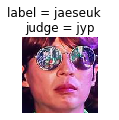

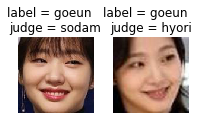

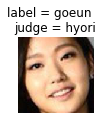

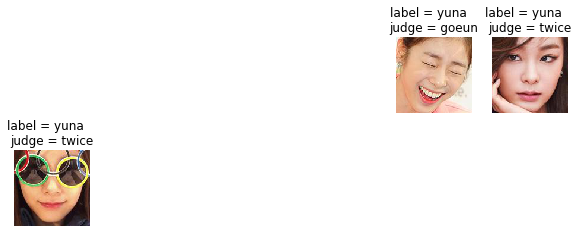

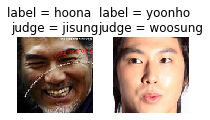

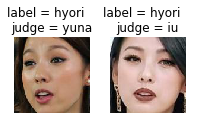

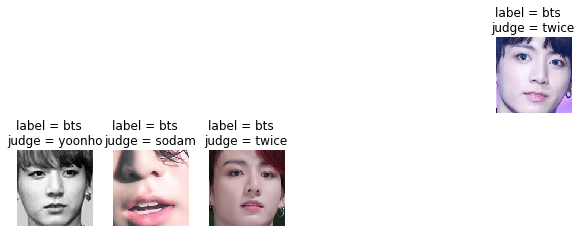

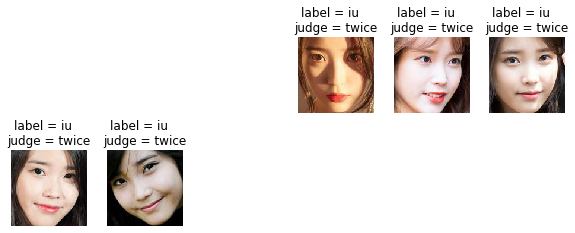

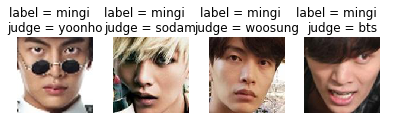

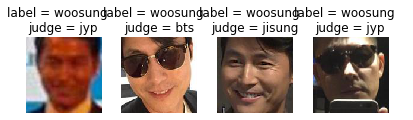

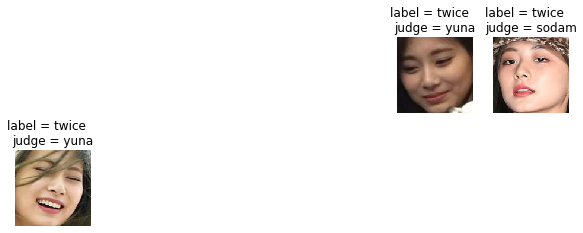

<Figure size 720x720 with 0 Axes>

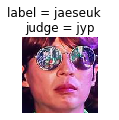

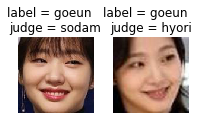

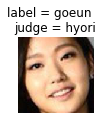

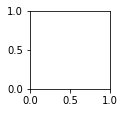

In [0]:
def show_batch_wrong(data_gen, class_l):
  # get image and label from data generator
  i = 1
  for img_batch, l_batch in data_gen:
    if i > 36: break
    plt.figure(figsize=(10,10))
    ret = []
    img_title = model_fine.predict(img_batch)
    print(l_batch[1])
    #if l_batch[n]==1][0] != 'hyori': continue
    for img in img_title:
      ret.append(np.array(img).argmax())
  
    for n in range(36):
      if class_l[l_batch[n]==1][0] == CLASS_NAMES[ret[n]]: continue
      plt.subplot(6, 6, i)
      print(i)
      i+=1
      if i > 36: break
      plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.5, wspace=0.2)
      plt.imshow(img_batch[n])
      title_name = 'label = ' + class_l[l_batch[n]==1][0] + "   \n" + "judge = " + CLASS_NAMES[ret[n]]
      plt.title(title_name)
      plt.axis('off')

show_batch_wrong(test_data_gen, CLASS_NAMES)

In [0]:
!cp /content/best_model.h5 /content/drive/Shared\ drives/scsa_2019_a/9_smc/curr_best.h5